In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from datetime import datetime
from IPython.display import clear_output

#Circuitos
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info.operators.predicates import is_unitary_matrix
from qiskit.quantum_info import SparsePauliOp # Necesito un obsevable en concreto...

from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap, ZZFeatureMap, QFT
from qiskit.circuit import ParameterVector
from qiskit.utils import algorithm_globals


from sklearn.preprocessing import MinMaxScaler


from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 49

In [2]:
df=pd.read_csv('./datos/AirPassengers.csv')
df['Month']=pd.to_datetime(df['Month'], infer_datetime_format=True)
df=df.set_index(['Month'])

df_log=np.log(df)
data_shift=df_log-df_log.shift()
data_shift = data_shift.dropna()

In [3]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

def circuitoRegresor_CodificacionAngular(n_qubits=1):
    qc = QuantumCircuit(n_qubits)
    
    inputs = ParameterVector("inputs",n_qubits)
    pesos = ParameterVector("pesos",2*n_qubits)
    feature_map = QuantumCircuit(n_qubits)
    feature_map.h(range(n_qubits))
    
    
    for i in range(n_qubits):
        feature_map.ry(inputs[i],i)
        
    for i in range(n_qubits-1):
        feature_map.cx(i,i+1)
    
    for i in range(n_qubits):
        feature_map.ry(inputs[i],i)
    
    ansatz = RealAmplitudes(n_qubits,reps=8)
    #ansatz = QuantumCircuit(n_qubits)
    #for i in range(n_qubits):
    #    ansatz.ry(pesos[i],i)
    #    
    #for i in range(n_qubits-1):
    #    ansatz.cz(i,i+1)
    #
    #for i in range(n_qubits,2*n_qubits):
    #    ansatz.ry(pesos[i],i-n_qubits)
        
    
    
    qc.compose(feature_map, inplace=True)
    qc.compose(QFT(n_qubits, inverse = True), inplace=True)
    qc.compose(ansatz, inplace=True)
    
    
    
    
    return feature_map.parameters, ansatz.parameters, qc, feature_map, ansatz

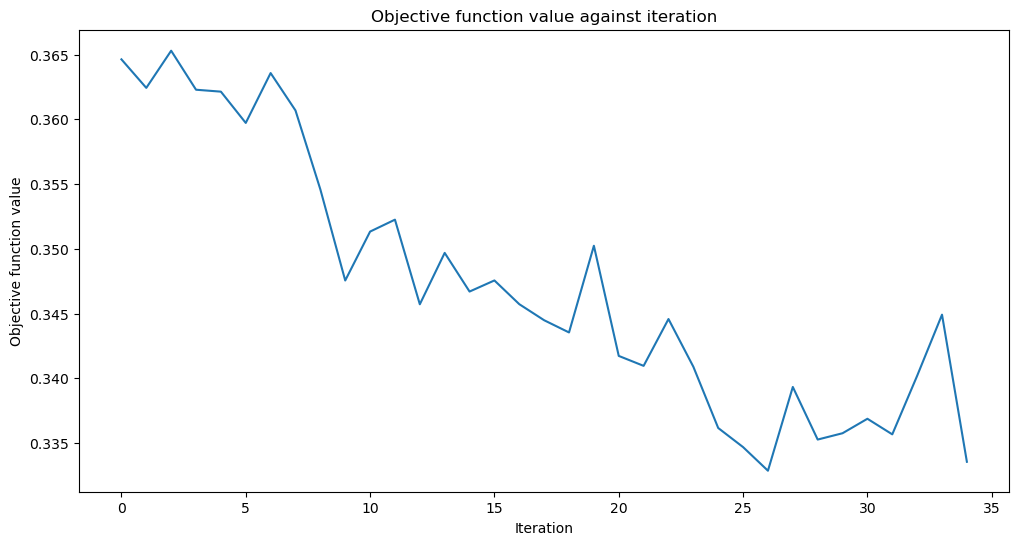

capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


KeyboardInterrupt: 

In [5]:
n_estadistico = 3
p_train = 0.8
window = 12

train_losses = []
valid_losses = []
lista_predicciones = [] 
errores_cuadraticos_valid = []
for est in range(n_estadistico):
    
    # Partición de los datos
    pasajeros = np.array(data_shift['#Passengers'])
    pasajeros_train = pasajeros[:int(pasajeros.shape[0]*0.8)]
    pasajeros_test = pasajeros[int(pasajeros.shape[0]*0.8):]
    
    tam_train = pasajeros_train.shape[0] - window
    tam_test = pasajeros_test.shape[0] - window

    conjunto_train = []
    objetivo_train = []

    conjunto_test = []
    objetivo_test = []

    for i in range(0,tam_train):
        conjunto_train.append(pasajeros_train[0+i:window+i])
        objetivo_train.append(pasajeros_train[window+i])

    for i in range(0,tam_test):
        conjunto_test.append(pasajeros_test[0+i:window+i])
        objetivo_test.append(pasajeros_test[window+i])

    objetivo_train = np.array(objetivo_train)
    conjunto_train = np.array(conjunto_train)

    objetivo_test = np.array(objetivo_test)
    conjunto_test = np.array(conjunto_test)
    
    scaler = MinMaxScaler((0.3, np.pi-0.3))
    conjunto_train = scaler.fit_transform(conjunto_train)
    objetivo_train = (-1.6/(np.min(objetivo_train) - np.max(objetivo_train)))*objetivo_train - 0.8 + np.min(objetivo_train)*(1.6/(np.min(objetivo_train) - np.max(objetivo_train)))


    # Creacion del modelo
    inputs, params, circuito, f1, f2 = circuitoRegresor_CodificacionAngular(window)
    modeloEstimator = EstimatorQNN(
        circuit=circuito, input_params=inputs, weight_params=params
    )
    regressor = NeuralNetworkRegressor(
        neural_network=modeloEstimator,
        loss='absolute_error' ,
        optimizer=COBYLA(maxiter=2000),
        callback=callback_graph
    )
    
    # Entrenamiento del modelo
    # create empty array for callback to store evaluations of the objective function
    objective_func_vals = []
    plt.rcParams["figure.figsize"] = (12, 6)

    # fit to data
    regressor.fit(conjunto_train, objetivo_train)

    # Test
    conjunto_test = scaler.fit_transform(conjunto_test)
    redHibrida.eval()
    objetivo_testAux = (-1.6/(np.min(objetivo_test) - np.max(objetivo_test)))*objetivo_test - 0.8 + np.min(objetivo_test)*(1.6/(np.min(objetivo_test) - np.max(objetivo_test)))
    
    espacio = np.arange(0,objetivo_test.shape[0])
    y_ = regressor.predict(conjunto_test)
    plt.figure(figsize=(20,10))
    plt.plot(espacio ,objetivo_testAux, marker='o',color='red', label='Verdaderos')
    plt.plot(espacio,y_ , color='blue', marker='^',label='Predicciones') 
    plt.show()
    
    lista_predicciones.append(y_)
    
    y_ = (y_ +  0.8 - np.min(objetivo_test)*(1.6/(np.min(objetivo_test) - np.max(objetivo_test))))/(-1.6/(np.min(objetivo_test) - np.max(objetivo_test)))
    

    error = np.sum( (objetivo_test[:] - y_[:])**2)/(len(objetivo_test))
    
    errores_cuadraticos_valid.append(error)
    print(error)

In [ ]:
errores_cuadraticos_valid = np.array(errores_cuadraticos_valid).reshape(len(errores_cuadraticos_valid))

print(errores_cuadraticos_valid)